 
       
###  Outubro, 8, 2024


## 1. TP1 - Grupo 20

Afonso Martins Campos Fernandes - A102940

Luís Filipe Pinheiro Silva - A105530

### 2. Exercicio 2 - Sistema de Tráfego  

## Bibliotecas a Utilizar:

### 1) `networkx`:
- Biblioteca que auxilia na criação e manipulação de grafos, oferecendo uma interface simples para trabalhar com grafos orientados e não orientados.
- Neste trabalho, vamos trabalhar com **grafos orientados** e verificar se são **fortemente conectados**. Com a utilização desta biblioteca, conseguiremos manipular as **arestas** e **nós** do grafo.

### 2) `ortools`:
- A biblioteca `ortools` é uma ferramenta que permite resolver problemas de **programação linear**, **programação inteira** e problemas de **otimização com restrições** utilizando diferentes tipos de **solvers**.
- Vamos utilizá-la neste trabalho para resolver o problema de **remoção de arestas**, garantindo que o grafo permaneça **fortemente conexo**. O `ortools` será responsável por maximizar o número de arestas que podem ser removidas, mantendo as restrições de conectividade.

### 3) `random`:
- A biblioteca `random` é uma biblioteca do Python que fornece funções para a **geração de números aleatórios** e **amostras aleatórias**.
- Vamos utilizá-la para gerar **descendentes aleatórios** de nós no grafo. Isso significa que a criação das arestas entre os nós será feita de maneira aleatória, respeitando os limites definidos.

### 4) `matplotlib.pyplot`:
- Esta biblioteca oferece uma interface fácil de utilizar para criar uma variedade de tipos de graficos e visualizações de forma rápida e eficiente de forma rápida e eficaz.

In [44]:
import networkx as nx
from ortools.linear_solver import pywraplp
import random 
import matplotlib.pyplot as plt

### Alínea a)

- Vamos gerar um grafo orientado ligado aleatório com `N-nodos` entre 6 e 10, onde cada nodo possui entre 1 a 3 descendentes, **sem loops** ou destinos repetidos.
- O grafo deve ser **fortemente ligado**, ou seja, para cada par de nós **<n1, n2>**, deve existir um caminho de `n1` para `n2` e outro caminho de `n2` para `n1`.


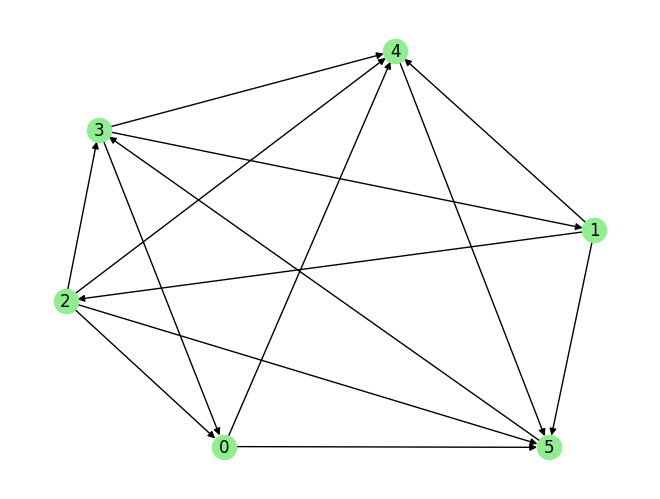

In [76]:
import networkx as nx
import random
import matplotlib.pyplot as plt

N = random.randint(6, 10)

def geraGrafo(N): 
    while True: 
        grafo = nx.DiGraph()
        grafo.add_nodes_from(range(N))

        # Criação de um ciclo básico que garante conectividade
        nodes = list(range(N))
        random.shuffle(nodes)
        
        # Criar um ciclo que garante que todos os nós são visitados
        for i in range(N):
            grafo.add_edge(nodes[i], nodes[(i+1) % N])

        # Adicionar arestas adicionais de forma aleatória, mas sem permitir n1 <-> n2
        for node in range(N):
            possible_dests = [n for n in range(N) if n != node and not grafo.has_edge(n, node)]
            desc = min(random.randint(1, 3), len(possible_dests))
            dest = random.sample(possible_dests, desc)
            grafo.add_edges_from((node, d) for d in dest)

        # Verificar se o grafo é fortemente conectado
        if nx.is_strongly_connected(grafo):
            return grafo

# Gerar o grafo
grafo = geraGrafo(N)

# Desenhar o grafo
nx.draw(grafo, with_labels=True, node_color='lightgreen', arrows=True)
plt.show()


### Descrição do Bloco de Código

A função **_geraGrafo(N)_** assim como é pedido para resolver o problema, gera um grafo com N-nodes que seja orientado ligado, ou seja, é possivél ir para qualquer node a qualquer outro node no grafo.

A função começa com um **_while true_**, que permite com que os grafos gerados sejam sempre orientados ligados.

De seguida é geração do grafo é conseguida com as funções: **_nx.DiGraph()_**, que cria um grafo vazio, e **_.add_nodes_from(N)_**, que adiciona o número de N-nodes(de 0 a N - 1).

Com **_random.shuffle(nodes)_** troca a ordem dos nodes que se encontram numa lista de nodes, de forma que o ciclo gerado seja aleatório.

Para adicionar as arestas ao ciclo utilizamos o bloco de código:

``for i in range(N):
    G.add_edge(nodes[i], nodes[(i+1) % N])``

Que cria um ciclo no grafo. Um ciclo é uma sequência de arestas que passa por todos os nodes pelo menos uma vez e volta para o ponto de partida.
Para cada **_nodes[i]_**, uma aresta é criada de **_nodes[i]_** para o próximo node da lista, a operação seguinte garante que o último node da lista volte a ser conectado ao ao primeiro node fechando assim o ciclo.

No **_for_** seguinte um loop é iterado sobre todos os nodes do grafo que verifica algumas restrições, como:
    - Não permite a ligação entre nodos da forma: n1 <-> n2;
    - Limite de descendentes de cada nodo, no caso do problema um nodo pode ter de 1 a 3 descendentes;
Os destinos de cada descendente é produzido com a ajuda da função **_random.sample(...)_** que nos garante que os destinos selecionados são únicos.
E por fim adiciona as arestas com direção do node atual para o node destino.


Seguinte do **_for_** anterior muito elaborado temos um **_if condition_** que pega no grafo gerado e verifica com a função **_nx.is_strongly_connected(grafo)_** se o mesmo é fortemente ligado, caso seja retorna o mesmo.

### Alinea b)

Pretende-se fazer  manutenção interrompendo  determinadas vias. Determinar o maior número de vias que é possível remover mantendo o grafo ligado.

**Resolução:**

> Solution is optimal.


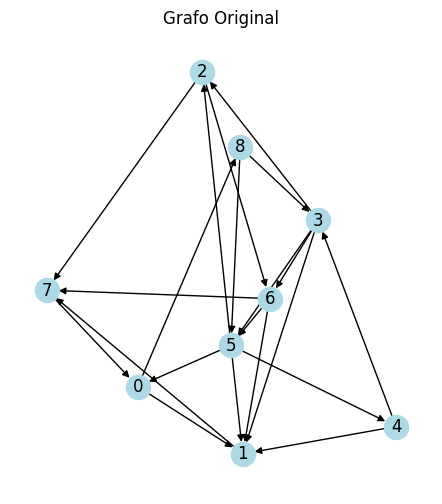

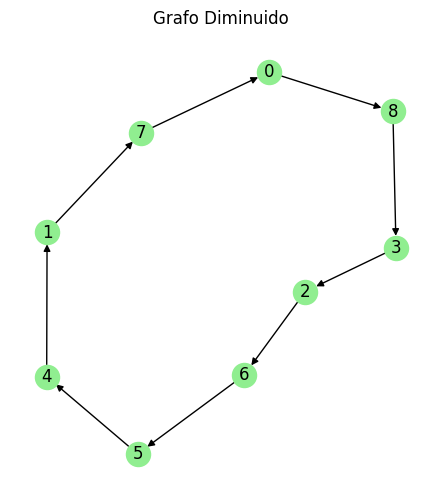

Máximo de arestas removidas: 12
Arestas removidas: [(0, 1), (2, 7), (3, 6), (3, 5), (3, 1), (4, 3), (5, 0), (5, 1), (5, 2), (6, 1), (6, 7), (8, 5)]


In [1]:
import networkx as nx
from ortools.linear_solver import pywraplp
import random
import matplotlib.pyplot as plt

N = random.randint(6,10)

def geraGrafo(N): 
    while True: 
        grafo = nx.DiGraph()
        grafo.add_nodes_from(range(N))
        nodes = list(range(N))
        random.shuffle(nodes)
        for i in range(N):
            grafo.add_edge(nodes[i], nodes[(i+1) % N])
        for node in range(N):
            possible_dests = [n for n in range(N) if n != node and not grafo.has_edge(n, node)]
            desc = min(random.randint(1, 3), len(possible_dests))
            dest = random.sample(possible_dests, desc)
            grafo.add_edges_from((node, d) for d in dest)
        if nx.is_strongly_connected(grafo):
            return grafo  

def solve(graph):
    solver = pywraplp.Solver.CreateSolver('SCIP')
    Q = len(graph.nodes())
    
    # Criação de variáveis para as arestas
    A = {}
    for a, b in graph.edges():
        A[(a, b)] = solver.BoolVar(f"A[{a},{b}]")

    #Criação de variáveis para os caminhos
    C = {}
    for o in range(Q):
        for d in range(Q):
            if o != d:
                C[(o,d)] = {}
                for c in nx.shortest_simple_paths(graph,o,d):
                    caminho = []
                    for i in range(len(c)-1):
                        caminho.append((c[i],c[i+1]))
                    C[(o,d)][tuple(caminho)] = solver.BoolVar(f"C[{o},{d},{caminho}]")
    
    # Existe pelo menos um caminho entre quaisquer dois vértices

    for o in range(Q):
        for d in range(Q):
            if o != d:
                solver.Add(sum([C[(o,d)][c] for c in C[o,d]]) >= 1)

    
    # Adicionar restrições de conectividade
    for o in range(Q):
        for d in range(Q):
            if o != d:
                if len(C[(o,d)]) > 1:
                    for c in C[(o,d)]:
                        solver.Add(sum(A[a] for a in c) >= len(c) * C[(o,d)][c])

    # Minimizar o número de arestas utilizadas
    solver.Minimize(solver.Sum([A[(a, b)] for a, b in graph.edges()]))

    # Resolver o problema
    status = solver.Solve()

    # Verificar o status da solução
    if status == pywraplp.Solver.INFEASIBLE:
        print("No feasible solution.")
        return None, 0, []
    elif status == pywraplp.Solver.OPTIMAL:
        print("> Solution is optimal.")

    # Criar o grafo de saída e lista de arestas removidas
    resultado_grafo = nx.DiGraph()
    lista_arestas_removidas = []
    for (a, b) in graph.edges():
        if A[(a, b)].solution_value() > 0:
            resultado_grafo.add_edge(a, b)
        else:
            lista_arestas_removidas.append((a, b))

    max_arestas_removidas = len(lista_arestas_removidas)
    return resultado_grafo, max_arestas_removidas, lista_arestas_removidas

# Exemplo de uso
grafo = geraGrafo(N)
resultado_grafo, max_arestas_removidas, lista_arestas_removidas = solve(grafo)

# Guardar o número máximo de arestas removidas numa lista
arestas_removidas_lista = [max_arestas_removidas]

# Desenhar o grafo original
plt.figure(figsize=(12, 6))
plt.subplot(121)
nx.draw(grafo, with_labels=True, node_color='lightblue', arrows=True)
plt.title("Grafo Original")

plt.show()

# Desenhar o grafo resultante
plt.figure(figsize=(12, 6))
plt.subplot(121)
nx.draw(resultado_grafo, with_labels=True, node_color='lightgreen', arrows=True)
plt.title("Grafo Diminuido")

plt.show()

print(f"Máximo de arestas removidas: {max_arestas_removidas}")
print(f"Arestas removidas: {lista_arestas_removidas}")

**_Estratégia para resolver o problema:_**

1) _Especificação do Problema de Otimização_:

    Na resolução deste problema utilizamos restrições que garantem que o grafo gerado vai ser orientado ligado ou fortemente ligado, mesmo com a remoção de algumas arestas.

    Para cada ligação existente no grafo, é tomada uma decisão ou se mantém ou é removida. Essa decisão é representada por uma variável que pode assumir apenas dois valores, 0 ou 1. Caso seja 0 a aresta é removida, caso seja 1 a aresta é mantida.
    Também são criadas variáveis binárias para os caminhos, ****_C[(o,d)][caminho]_**** para cada caminho entre dois nodes diferentes. Cada variável binária tem o valor 1 se o caminho for utilizado e 0 se for o caso contrário.

2) _Restrições das Ligações/Conectividade_:

    Para cada para de nodes, (o,d), tem que existir no mínimo um caminho orientado ligado. Esta condição é satisfeita a partir de:

        **solver.Add(sum([C[(o,d)][c] for c in C[o,d]]) >= 1)**

    Para cada caminho que seja selecionado,as arestas que caracterizam o caminho foi escolhido como parte da solução e as suas arestas correspondentes devem existir no gráfico gerado.

**_Objétivo:_**

O grupo teve como objétivo na resolução do problema em minimizar o número de arestas existentes em um grafo orientado ligado continuando a se orientado ligado com as remoções. Para isso, utilizamos:

        **solver.Minimize(solver.Sum([A[(a, b)] for a, b in graph.edges()]))**
, com esta função conseguimos remover o máximo de arestas possível, desde que o grafo continue a ser orientado ligado.


**_Conclusão:_**

Após a definição de todas as variáveis, impostas as retrições necessárias e o objétivo alcançado o solver contruido vai resolver o problema dado. Caso uma solução seja encontrada o solver vai devolver um grafo e uma lista das arestas que podem ser removidas desse grafo e o mesmo continua orientado ligado.  